In [20]:
#!pip install xgboost

In [44]:
import numpy as np
import pandas as pd

In [45]:
df=pd.read_csv('mushrooms.csv')
df

,class,cap-shape,cap-surface,cap-color,bruises,odor,gill-attachment,gill-spacing,gill-size,gill-color,...,stalk-surface-below-ring,stalk-color-above-ring,stalk-color-below-ring,veil-type,veil-color,ring-number,ring-type,spore-print-color,population,habitat
0,p,x,s,n,t,p,f,c,n,k,...,s,w,w,p,w,o,p,k,s,u
1,e,x,s,y,t,a,f,c,b,k,...,s,w,w,p,w,o,p,n,n,g
2,e,b,s,w,t,l,f,c,b,n,...,s,w,w,p,w,o,p,n,n,m
3,p,x,y,w,t,p,f,c,n,n,...,s,w,w,p,w,o,p,k,s,u
4,e,x,s,g,f,n,f,w,b,k,...,s,w,w,p,w,o,e,n,a,g
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
8119,e,k,s,n,f,n,a,c,b,y,...,s,o,o,p,o,o,p,b,c,l
8120,e,x,s,n,f,n,a,c,b,y,...,s,o,o,p,n,o,p,b,v,l
8121,e,f,s,n,f,n,a,c,b,n,...,s,o,o,p,o,o,p,b,c,l
8122,p,k,y,n,f,y,f,c,n,b,...,k,w,w,p,w,o,e,w,v,l


In [46]:
df.isnull().sum()

class                       0
cap-shape                   0
cap-surface                 0
cap-color                   0
bruises                     0
odor                        0
gill-attachment             0
gill-spacing                0
gill-size                   0
gill-color                  0
stalk-shape                 0
stalk-root                  0
stalk-surface-above-ring    0
stalk-surface-below-ring    0
stalk-color-above-ring      0
stalk-color-below-ring      0
veil-type                   0
veil-color                  0
ring-number                 0
ring-type                   0
spore-print-color           0
population                  0
habitat                     0
dtype: int64

In [47]:
import matplotlib.pyplot as plt
import seaborn as sns

In [48]:
M_cols = df.columns.to_list()
print("Value Distribution:\n")
for col in M_cols:
    print(col,"\n",df[col].value_counts(),"\n\n")

Value Distribution:

class 
 e    4208
p    3916
Name: class, dtype: int64 


cap-shape 
 x    3656
f    3152
k     828
b     452
s      32
c       4
Name: cap-shape, dtype: int64 


cap-surface 
 y    3244
s    2556
f    2320
g       4
Name: cap-surface, dtype: int64 


cap-color 
 n    2284
g    1840
e    1500
y    1072
w    1040
b     168
p     144
c      44
r      16
u      16
Name: cap-color, dtype: int64 


bruises 
 f    4748
t    3376
Name: bruises, dtype: int64 


odor 
 n    3528
f    2160
s     576
y     576
l     400
a     400
p     256
c     192
m      36
Name: odor, dtype: int64 


gill-attachment 
 f    7914
a     210
Name: gill-attachment, dtype: int64 


gill-spacing 
 c    6812
w    1312
Name: gill-spacing, dtype: int64 


gill-size 
 b    5612
n    2512
Name: gill-size, dtype: int64 


gill-color 
 b    1728
p    1492
w    1202
n    1048
g     752
h     732
u     492
k     408
e      96
y      86
o      64
r      24
Name: gill-color, dtype: int64 


stalk-shape 
 t  

# EDA

# Countplot:

C:\Users\nehap\anaconda3\lib\site-packages\seaborn\_decorators.py:36: FutureWarning: Pass the following variable as a keyword arg: x. From version 0.12, the only valid positional argument will be `data`, and passing other arguments without an explicit keyword will result in an error or misinterpretation.
  warnings.warn(


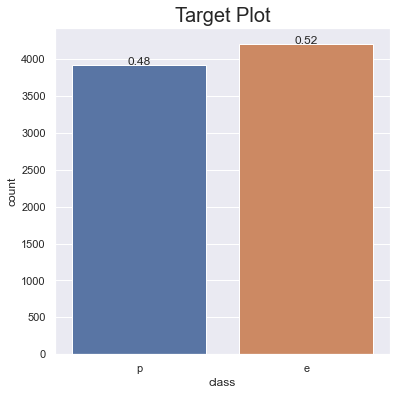

In [49]:
total = float(len(df[M_cols[0]]))
plt.figure(figsize=(6,6))
sns.set(style="darkgrid")
ax = sns.countplot(df[M_cols[0]])
for p in ax.patches:
    height = p.get_height()
    ax.text(p.get_x()+p.get_width()/2.,height + 3,'{:1.2f}'.format(height/total),ha="center")
plt.title("Target Plot", fontsize = 20)
plt.show()

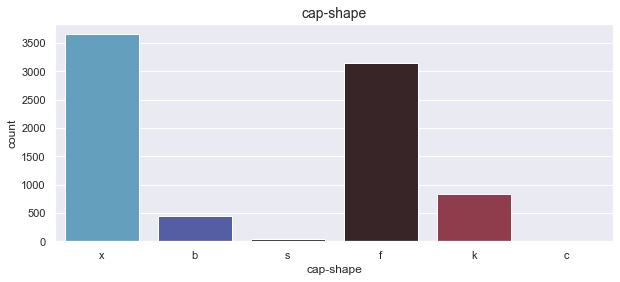

% of total:
x    45.00
f    38.80
k    10.19
b     5.56
s     0.39
c     0.05
Name: cap-shape, dtype: float64


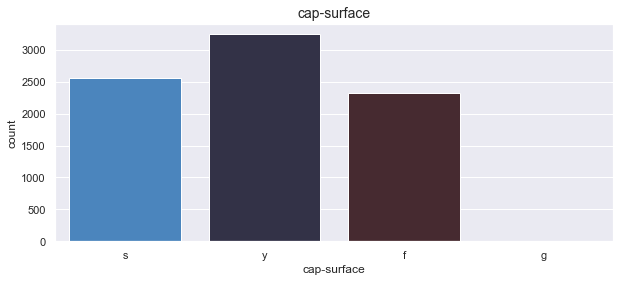

% of total:
y    39.93
s    31.46
f    28.56
g     0.05
Name: cap-surface, dtype: float64


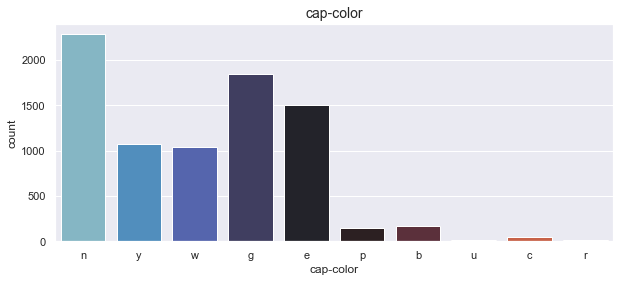

% of total:
n    28.11
g    22.65
e    18.46
y    13.20
w    12.80
b     2.07
p     1.77
c     0.54
r     0.20
u     0.20
Name: cap-color, dtype: float64


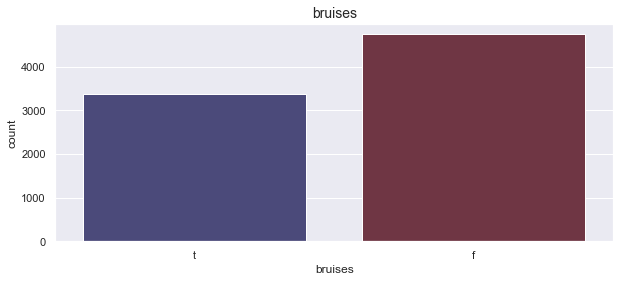

% of total:
f    58.44
t    41.56
Name: bruises, dtype: float64


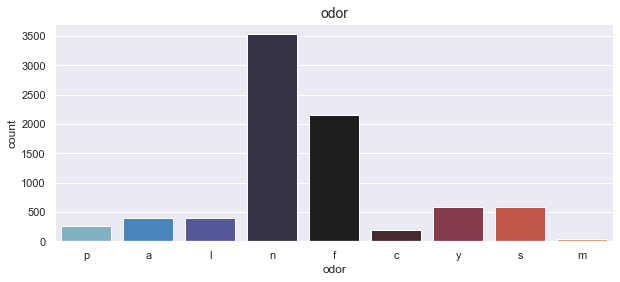

% of total:
n    43.43
f    26.59
s     7.09
y     7.09
l     4.92
a     4.92
p     3.15
c     2.36
m     0.44
Name: odor, dtype: float64


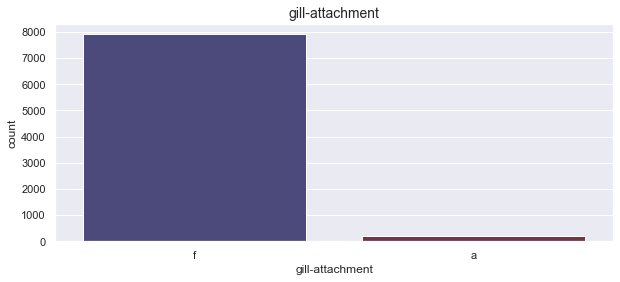

% of total:
f    97.42
a     2.58
Name: gill-attachment, dtype: float64


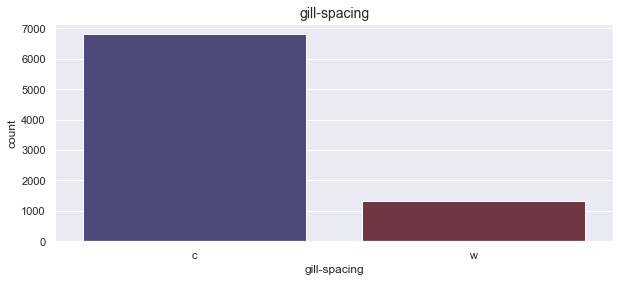

% of total:
c    83.85
w    16.15
Name: gill-spacing, dtype: float64


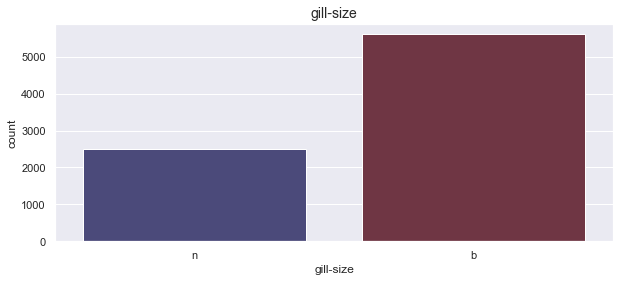

% of total:
b    69.08
n    30.92
Name: gill-size, dtype: float64


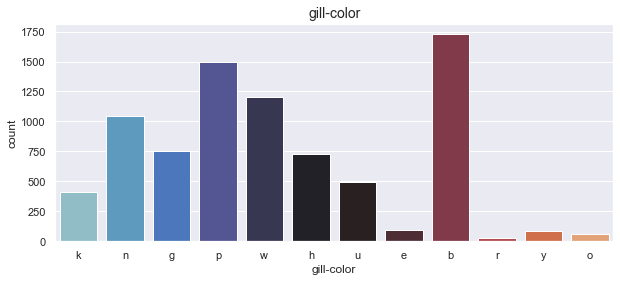

% of total:
b    21.27
p    18.37
w    14.80
n    12.90
g     9.26
h     9.01
u     6.06
k     5.02
e     1.18
y     1.06
o     0.79
r     0.30
Name: gill-color, dtype: float64


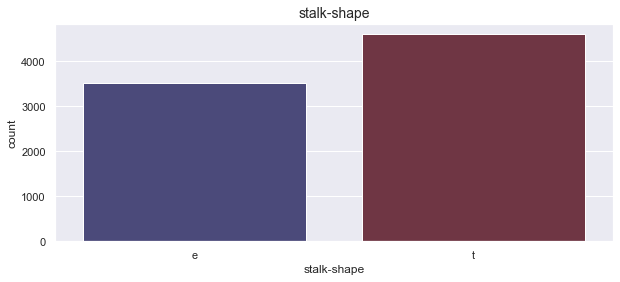

% of total:
t    56.72
e    43.28
Name: stalk-shape, dtype: float64


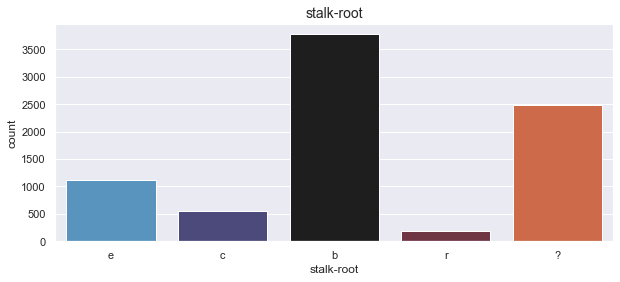

% of total:
b    46.48
?    30.53
e    13.79
c     6.84
r     2.36
Name: stalk-root, dtype: float64


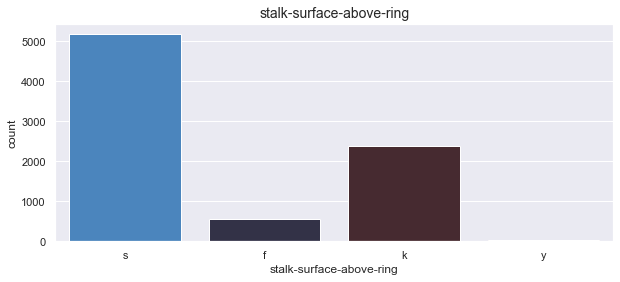

% of total:
s    63.71
k    29.20
f     6.79
y     0.30
Name: stalk-surface-above-ring, dtype: float64


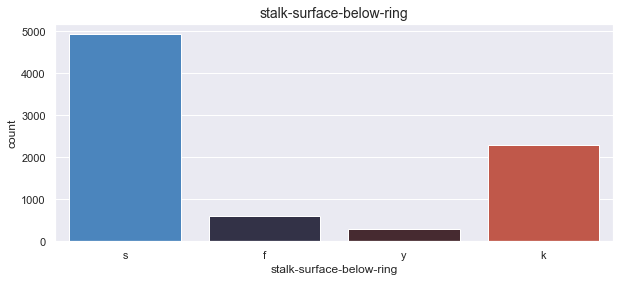

% of total:
s    60.76
k    28.36
f     7.39
y     3.50
Name: stalk-surface-below-ring, dtype: float64


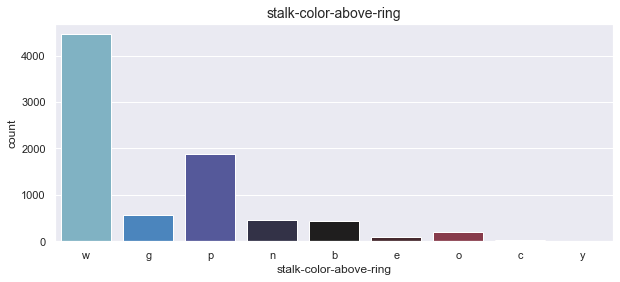

% of total:
w    54.95
p    23.04
g     7.09
n     5.51
b     5.32
o     2.36
e     1.18
c     0.44
y     0.10
Name: stalk-color-above-ring, dtype: float64


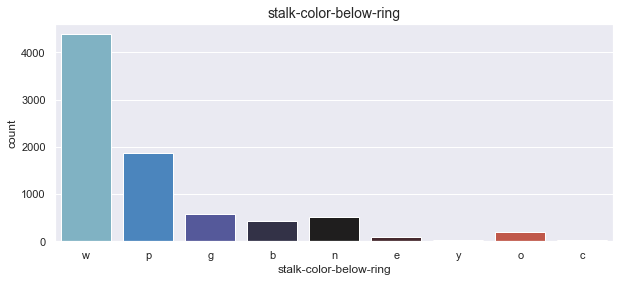

% of total:
w    53.96
p    23.04
g     7.09
n     6.30
b     5.32
o     2.36
e     1.18
c     0.44
y     0.30
Name: stalk-color-below-ring, dtype: float64


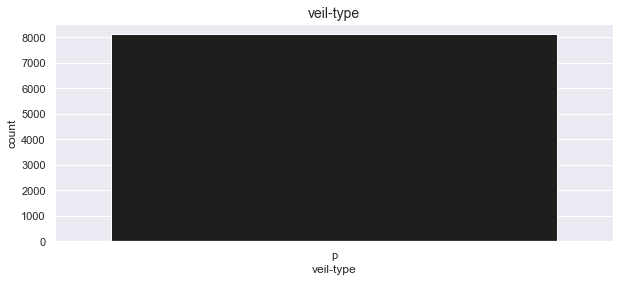

% of total:
p    100.0
Name: veil-type, dtype: float64


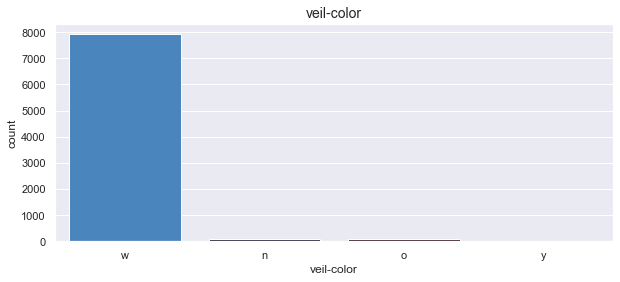

% of total:
w    97.54
n     1.18
o     1.18
y     0.10
Name: veil-color, dtype: float64


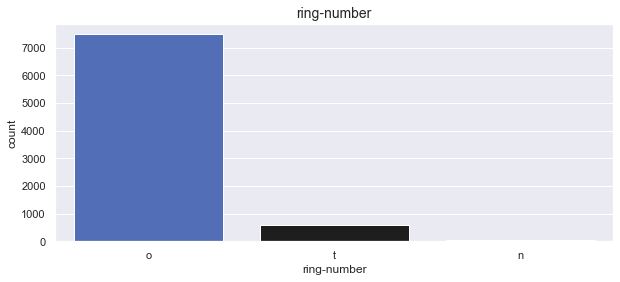

% of total:
o    92.17
t     7.39
n     0.44
Name: ring-number, dtype: float64


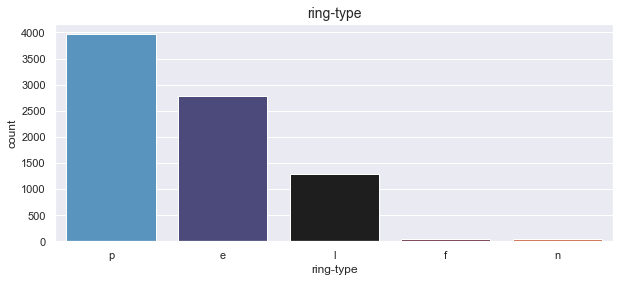

% of total:
p    48.84
e    34.17
l    15.95
f     0.59
n     0.44
Name: ring-type, dtype: float64


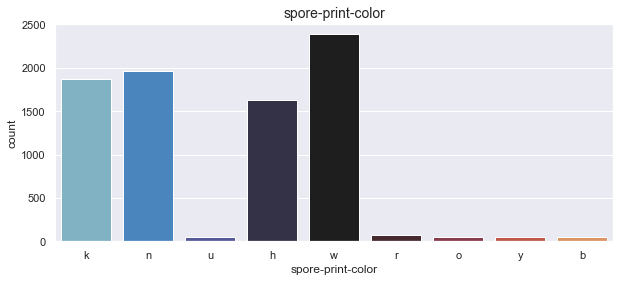

% of total:
w    29.39
n    24.22
k    23.04
h    20.09
r     0.89
o     0.59
u     0.59
y     0.59
b     0.59
Name: spore-print-color, dtype: float64


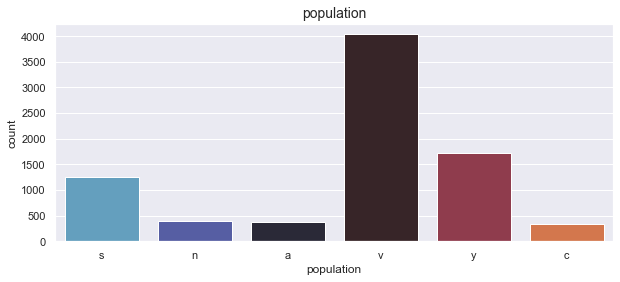

% of total:
v    49.73
y    21.07
s    15.36
n     4.92
a     4.73
c     4.19
Name: population, dtype: float64


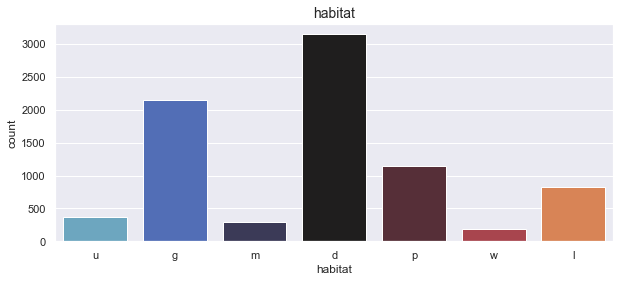

% of total:
d    38.75
g    26.44
p    14.08
l    10.24
u     4.53
m     3.59
w     2.36
Name: habitat, dtype: float64


In [50]:
for col in M_cols[1:]:
    plt.figure(figsize=(10,4))
    sns.countplot(x=col , data=df ,palette='icefire')
    plt.title(col, fontsize=14)
    plt.show()
    print("% of total:")
    print(round((df[col].value_counts()/df.shape[0]),4)*100)

**cap-shape** - Most of the mushrooms in our dataset have shape 'x' (45%) or 'f' (38.8%).

**cap-surface** - Most of the cap surface is 'y' (39.93%). Lowest number of cap surface is of 'g' (0.05%)

**cap-color** - Majority of the mushrooms in our dataset have a cap color 'n' (28.11%) or a 'g' (22.65%).

**bruises** - Most of the mushrooms in our dataset fall under 'f' (58.44%)

**odor** - Most frequent scents (over 70%) are either 'n' (43.43%) or 'f' (26.59%).

**gill-attachment** - Almost our entire data has 'f' gill attachment (about 97.5%). So this column is of no use in our analysis.

**gill-spacing** - More than 85% of the mushrooms in our dataset have a 'c' gill spacing so it again has a very little or no impact in our analysis.

**gill-size** - Most of the mushrooms in our dataset have gill sizes of 'b' (69.08%). Rest all are narrow.

**gill-color** - Over half of the mushrooms in our dataset have a gill color of 'b' (21.27%), 'p' (18.37%) or a 'w' (14.80%). There are 9 other colors that appear less often.

**stalk-shape** - Most of the mushrooms in our dataset have a stalk shape 't' (56.72%) others are all 'e'.

**stalk-root** - Most frequent stalk roots (over 75%) are either 'b' (46.48%) or '?' (30.53%).

**stalk-surface-above-ring** - Most frequent stalk surface above ring are either 's' (63.71%) or 'k' (29.2%).

**stalk-surface-below-ring** - Most frequent stalk surface below ring are either 's' (60.76%) or 'k' (28.36%).

**stalk-color-above-ring** - More than half of the mushrooms in our dataset have a 'w' (54.95%) stalk color.

**stalk-color-below-ring** - More than half of the mushrooms in our dataset have a 'w' (53.96%) stalk color.

**veil-type** - All veil type of the mushrooms are 'p' which makes this column pretty much usless in our analysis.

**veil-color** - Most of the mushrooms' veil color is 'w' (97.54%) so this column is pretty much usless in our analysis.

**ring-number** - Almost all of the mushrooms have 'o' ring number (92.17%) so this column is pretty much usless in our analysis.

**ring-type** - Over 98% of the mushrooms in our dataset have a 'p' (48.84%), 'e' (34.17%) or 'l' (15.95%) ring type.

**spore-print-color** - Most frequent colors are 'w' (29.39%), 'n' (24.22%) , 'k' (23.04%) and 'h' (20.09%).

**population** - Most frequent populations (over 70%) are either 'v' (49.73%) or 'y' (21.07%).

**habitat** - Most frequent habitats (over 65%) are either 'd' (38.75%) or 'g' (26.44%).

<ipython-input-51-95248e15a260>:2: RuntimeWarning: More than 20 figures have been opened. Figures created through the pyplot interface (`matplotlib.pyplot.figure`) are retained until explicitly closed and may consume too much memory. (To control this warning, see the rcParam `figure.max_open_warning`).
  plt.figure(figsize=(30,20))


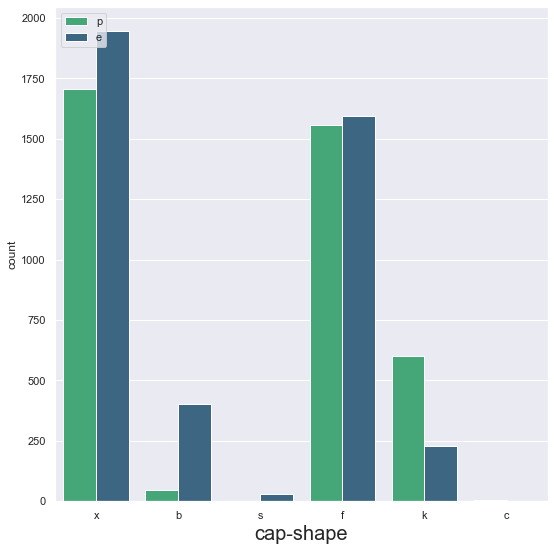

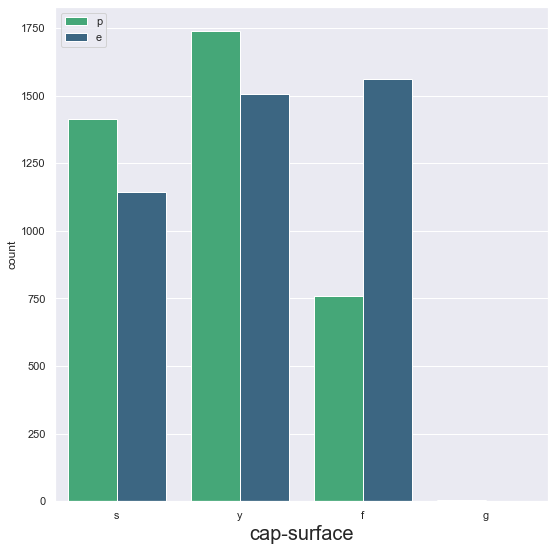

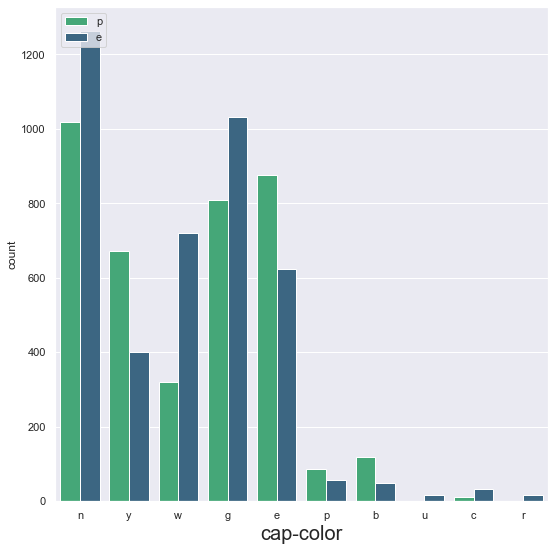

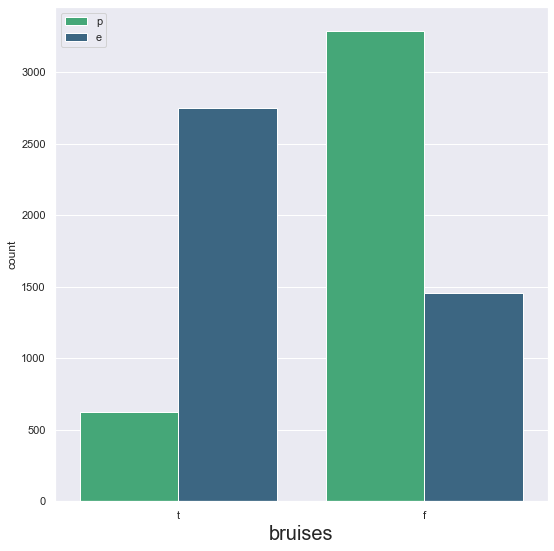

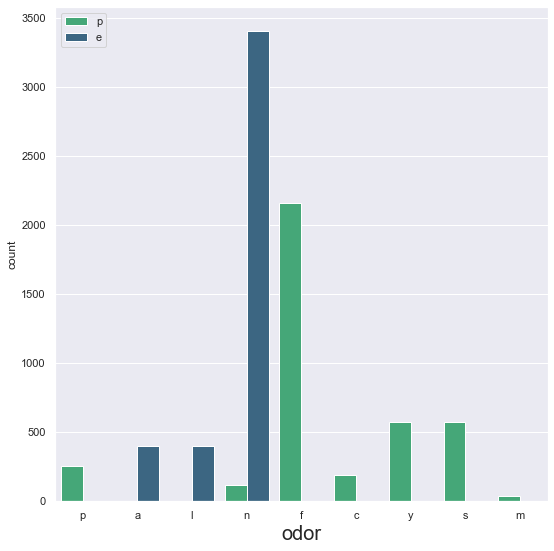

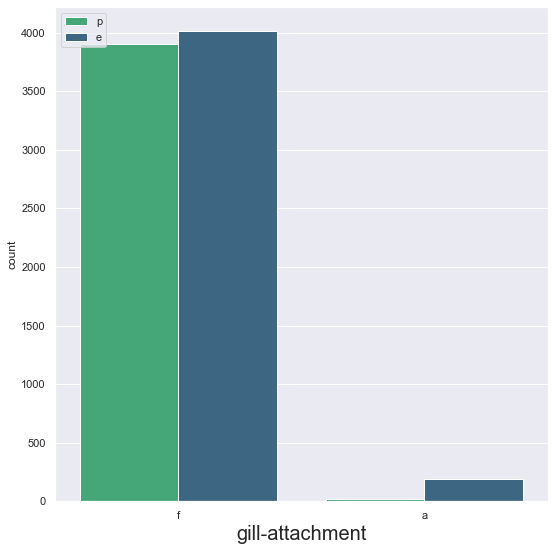

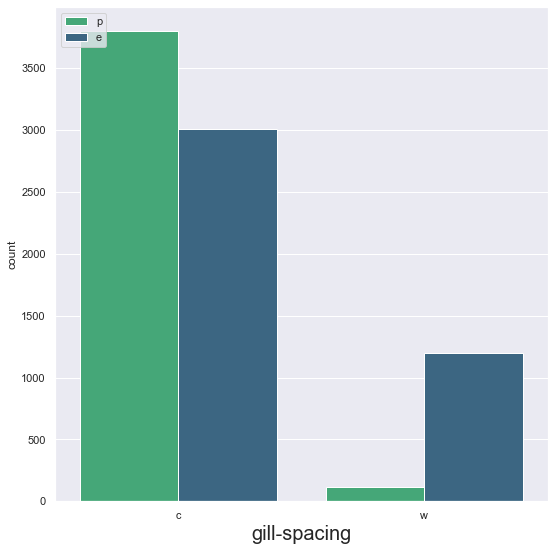

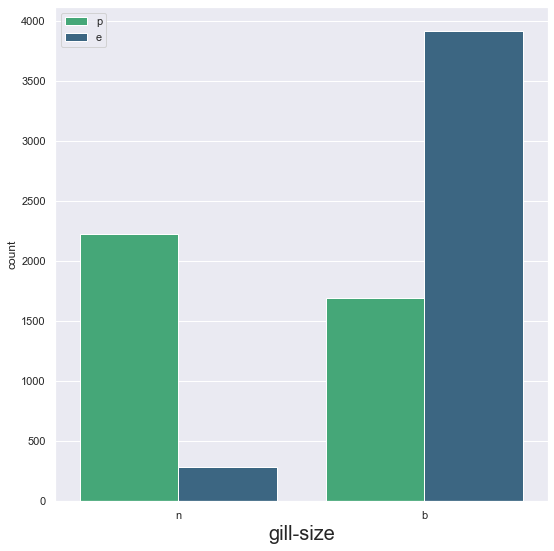

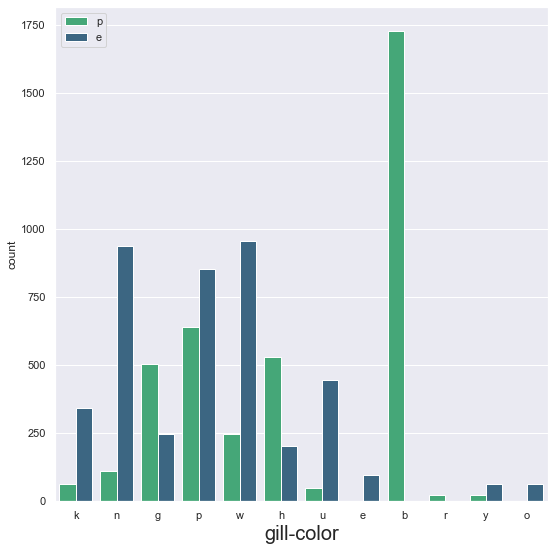

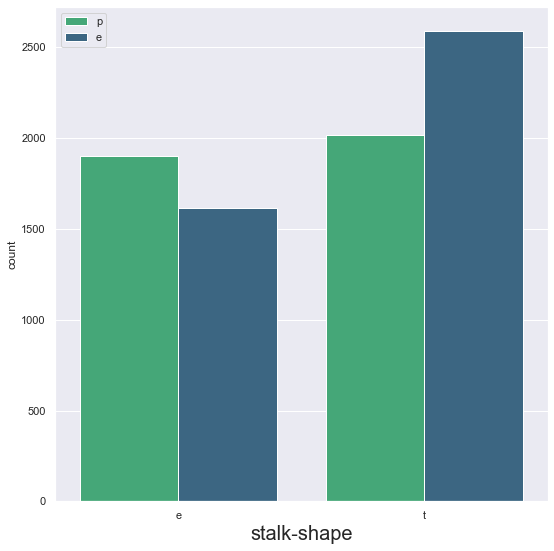

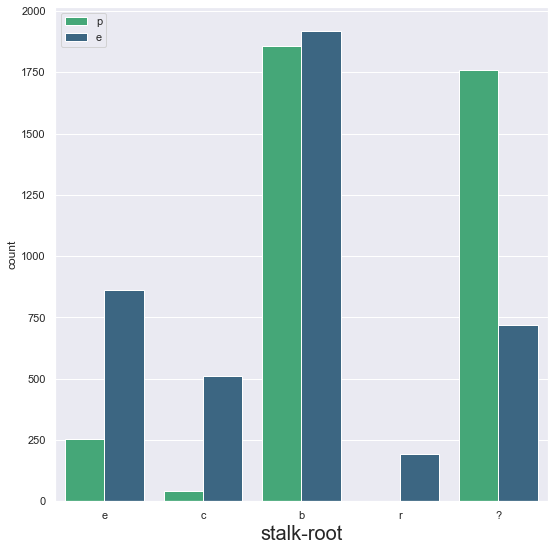

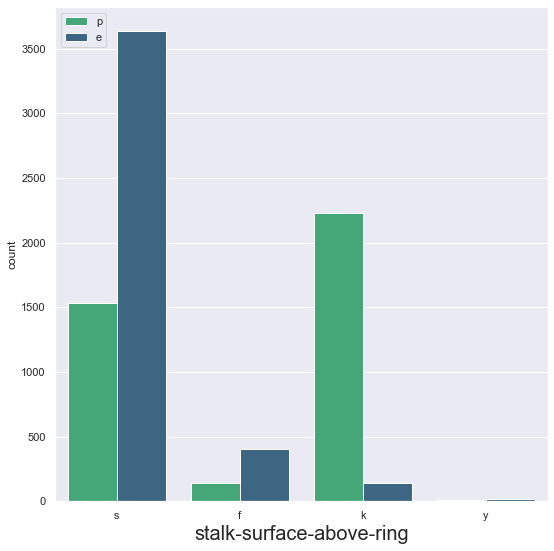

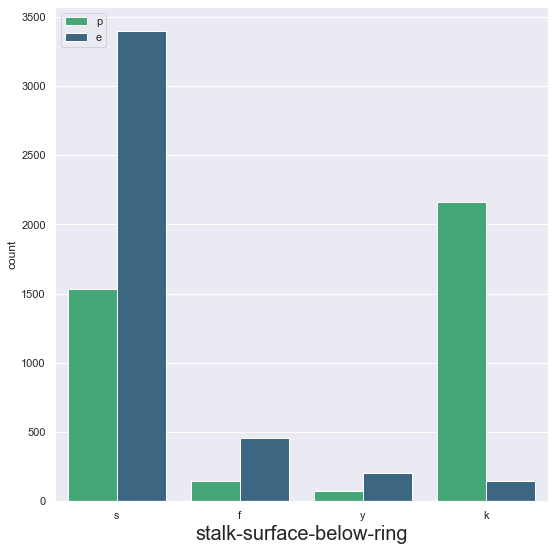

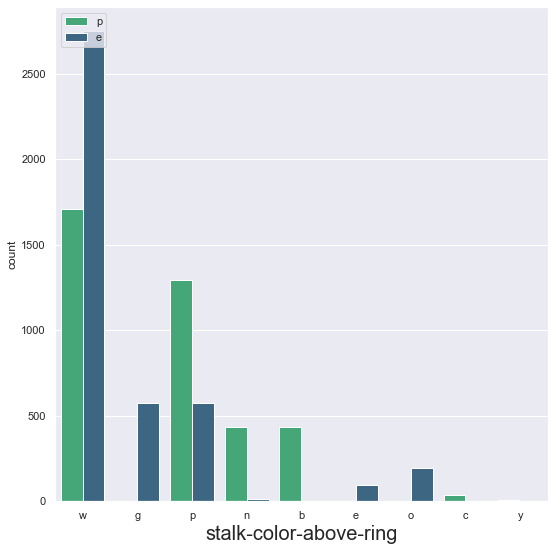

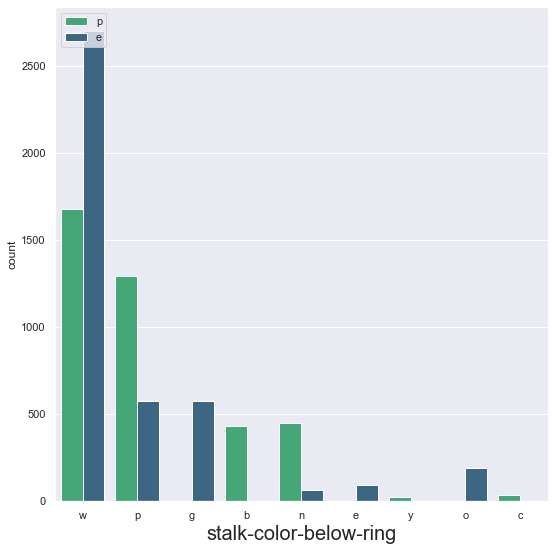

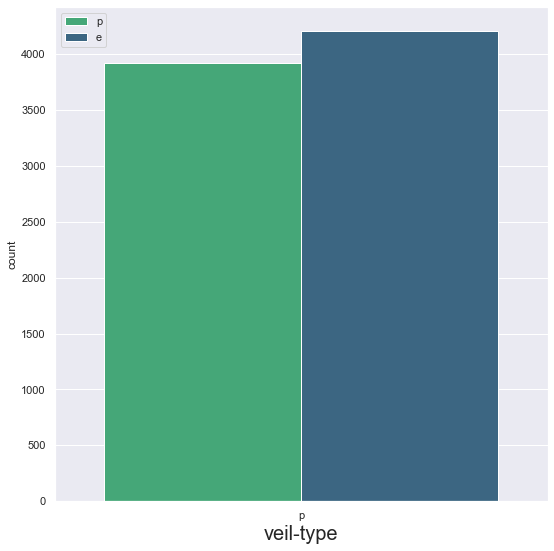

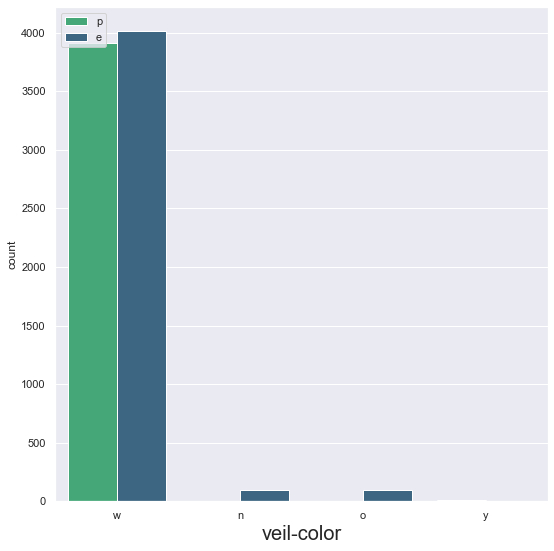

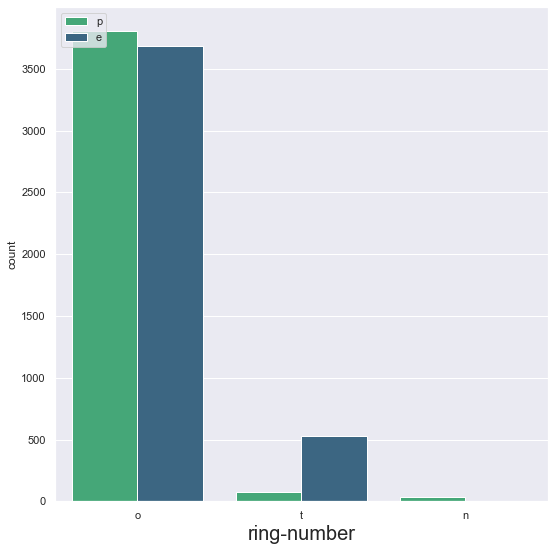

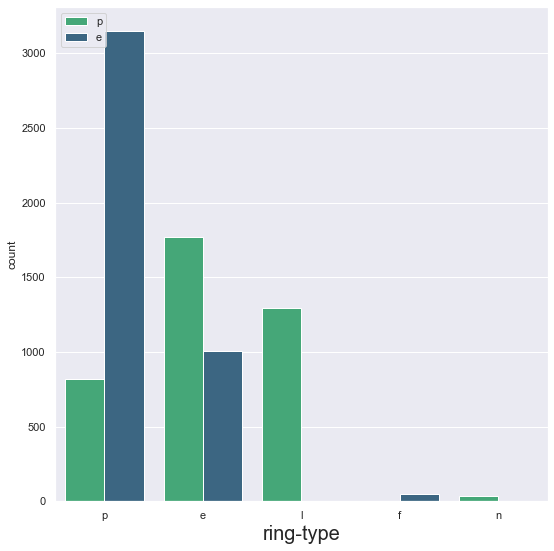

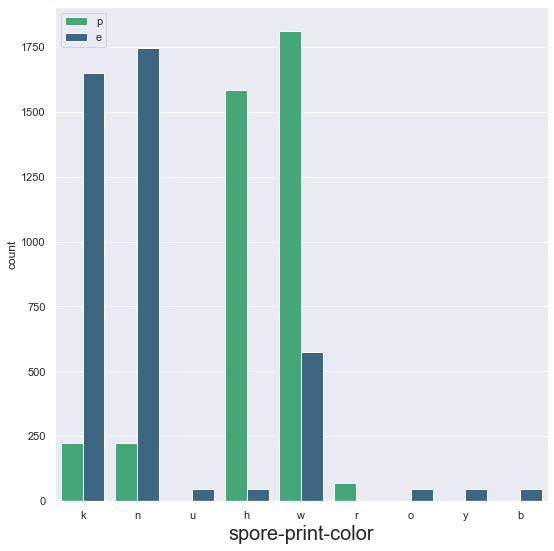

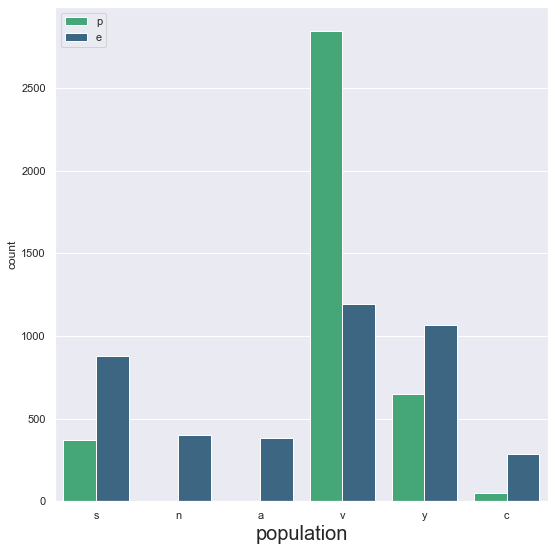

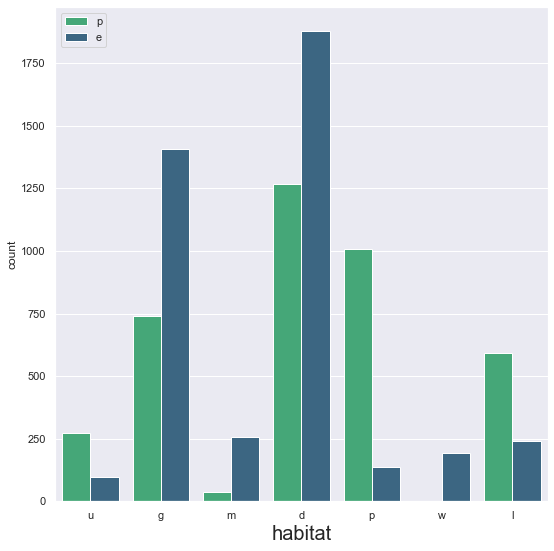

In [51]:
for col in M_cols[1:]: 
    plt.figure(figsize=(30,20))
    plt.subplot(2,3,1)
    sns.countplot(x=col ,hue='class', data=df ,palette='viridis_r')
    plt.xlabel(col, fontsize=20)
    plt.legend(loc='upper left')

In [52]:
[ pd.pivot_table(df, index=[col,"class"], aggfunc = {col:np.count_nonzero}) for col in M_cols[1:]]

[                 cap-shape
 cap-shape class           
 b         e            404
           p             48
 c         p              4
 f         e           1596
           p           1556
 k         e            228
           p            600
 s         e             32
 x         e           1948
           p           1708,
                    cap-surface
 cap-surface class             
 f           e             1560
             p              760
 g           p                4
 s           e             1144
             p             1412
 y           e             1504
             p             1740,
                  cap-color
 cap-color class           
 b         e             48
           p            120
 c         e             32
           p             12
 e         e            624
           p            876
 g         e           1032
           p            808
 n         e           1264
           p           1020
 p         e             56
          

**cap-shape**- Most of the 'k' cap shaped mushrooms in our dataset are poisonous.

**cap-surface**- Most mushrooms with 'f' cap surface are edible.

**cap-color** - Most 'w' cap colored mushrooms are edible while most 'y' cap colored mushrooms are poisonous.

**bruises** - 't' mushrooms are usually edible while 'f' ones are usually not.

**odor** - 'n' smell mushrooms are mostly edible by a huge margin while all 'f' smell mushrooms are poisonous.

**gill-attachment** - The 'a' gills are almost always edible.

**gill-spacing** - The 'w' gills are almost always edible.

**gill-size** - The 'n' gill sized mushrooms are almost always poisonous.

**gill-color** - The 'b' gill colored mushrooms are always poisonous.

**stalk-shape** - insignificant difference between each value in terms of poisonous or edible.

**stalk-root** - Mushrooms with '?' stalk roots are usually poisonous.

**stalk-surface-above-ring** - The 'k' surfaced mushrooms are usually poisonous, 's' are usually edible.

**stalk-surface-below-ring** - Looks the same as stalk-surface-above-ring.

**stalk-color-above-ring** - The 'w' stalk colored mushrooms are usually edible, 'p' ones are mostly poisonous.

**stalk-color-below-ring** - Looks the same as stalk-color-above-ring.

**veil-type** - All veil type of the mushrooms are partial so this column is pretty much usless in our analysis.

**veil-color** - Almost all of the mushrooms veil color are 'w' (97.54%) so this column is pretty much usless in our analysis.

**ring-number** - Almost all of the mushrooms ring number amount are 'o' (92.17%) so this column is pretty much usless in our analysis.

**ring-type** - The 'p' ring typed mushrooms are mostly edible, 'e' are mostly poisonous and 'l' ring types are all poisonous.

**spore-print-color** - The 'k' and 'n' ones are almost entirely edible while 'w' and 'h' (20.09%) are mostly poisonous.

**population** - Mushrooms with a 'v' population are mostly poisonous.

**habitat** - 'd' or 'g' are mostly edible.

In [53]:
from sklearn.preprocessing import OneHotEncoder
from sklearn.preprocessing import LabelEncoder

from sklearn.model_selection import train_test_split

from sklearn.metrics import f1_score
from sklearn.metrics import accuracy_score
from sklearn.metrics import recall_score
from sklearn.metrics import precision_score
from sklearn.model_selection import cross_validate

from sklearn.model_selection  import cross_val_score as CVS

from xgboost import XGBClassifier
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC

In [54]:
Del_cols = ['class','gill-attachment', 'stalk-shape', 'stalk-surface-below-ring', 'stalk-color-below-ring', 'veil-type', 'veil-color', 'ring-number'] 
X =df.copy()
for col in Del_cols:
    X = X.drop(col, axis = 1)
X=pd.get_dummies(X,columns=X.columns,drop_first=True)
X.head(2)

,cap-shape_c,cap-shape_f,cap-shape_k,cap-shape_s,cap-shape_x,cap-surface_g,cap-surface_s,cap-surface_y,cap-color_c,cap-color_e,...,population_n,population_s,population_v,population_y,habitat_g,habitat_l,habitat_m,habitat_p,habitat_u,habitat_w
0,0,0,0,0,1,0,1,0,0,0,...,0,1,0,0,0,0,0,0,1,0
1,0,0,0,0,1,0,1,0,0,0,...,1,0,0,0,1,0,0,0,0,0


In [55]:
y = df['class']
Encoder_y=LabelEncoder()
y = Encoder_y.fit_transform(y)
y

array([1, 0, 0, ..., 0, 1, 0])

In [56]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.75, random_state = 101)

In [57]:
def cross_val(model_name,model,X,y,cv):
    
    scores = CVS(model, X, y, cv=cv)
    print(f'{model_name} Scores:')
    for i in scores:
        print(round(i,2))
    print(f'Average {model_name} score: {round(scores.mean(),4)}')

index = ['Valid1','Valid2','Valid3','Valid4','Valid5']
scoring = ['accuracy','precision', 'recall','f1']

In [58]:
#model
LR = LogisticRegression()
#cross validation
LR_report = pd.DataFrame(cross_validate(LR, X, y, scoring=scoring))
#getting required score methods
LR_report = LR_report.iloc[:,2:]
#naming the columns
LR_report.columns = scoring
#naming the index
LR_report.index = index

#final result collection
model_1 = []

#Classification report
print("Clasification report:\n")
print(LR_report,"\n\n")
print("Mean Scores:\n")
for score in scoring:
    print(f"\t{score}: {round(LR_report[score].mean(),4)}")
    model_1.append(round(LR_report[score].mean(),4))

Clasification report:

        accuracy  precision    recall        f1
Valid1  0.896000   1.000000  0.784439  0.879199
Valid2  0.999385   1.000000  0.998723  0.999361
Valid3  0.973538   1.000000  0.945083  0.971766
Valid4  1.000000   1.000000  1.000000  1.000000
Valid5  0.862069   0.782038  0.989783  0.873732 


Mean Scores:

	accuracy: 0.9462
	precision: 0.9564
	recall: 0.9436
	f1: 0.9448
